In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import sys
plib = r'/Users/zijianleowang/Desktop/Projects_in_Cornell/Raman Library/RamanSpec/CODE/scripts'
sys.path.append(plib)
import Raman_preprocess as Raman, Raman_find_polymer as rfp
import imp
imp.reload(rfp)

In [3]:
raw_Raman = r'/Users/zijianleowang/Desktop/Projects_in_Cornell/RACE/Raman/PAO-Raman.csv'
df1 = pd.read_csv(raw_Raman).drop(0).T.iloc[:-1,:].astype(np.float)
wn = df1.iloc[0,:] # wavenumber
BG = df1.iloc[[1],:] # BG
X = df1.iloc[2:,:] # feature nxd
X = np.subtract(X,BG) # BG subtraction
X = Raman.smooth(X)# smoothing
X = Raman.baseline(X.T).T# baseline correction
X.reset_index(inplace=True,drop=True) # reset index
Xmean = X.mean()
Xstd = X.std()

In [4]:
sample1 = X.iloc[0,:]
from scipy import signal
Xid = []
Xpeak = []
Ypeak = []
for i in range(X.shape[0]):
    samplei = X.iloc[i,:]
    peakind = signal.find_peaks_cwt(samplei, np.arange(1,10))
    Xi = wn[peakind]
    Yi = samplei[peakind]
    if (np.logical_and(Xi>1160,Xi<1190)).any() and not (samplei>40).any():
        id2 = np.logical_and(Xi>1150,Xi<1200) # selected id2 for polyP
        ypeak = samplei[peakind[id2]].tolist()[0]
        if ypeak>0.5:
            Xpeak.append(wn[peakind[id2]].tolist()[0])
            Ypeak.append(ypeak)
            Xid.append(i)
X2 = X.iloc[Xid,:]

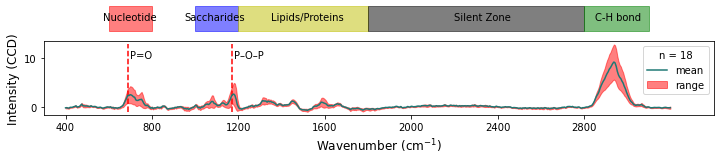

In [5]:
xlim = (300,3400)
ylim = (0,5)
fig1, ax1p = plt.subplots(2,1,figsize=(12,2),gridspec_kw={'height_ratios': [1, 3]})
ax0 = ax1p[0]
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
for i in ['right','left','top','bottom']:
    ax0.spines[i].set_visible(False)
def xrange(x,xp, y,name,c):
    ax0.fill_between(x,ylim[0],ylim[1],color=c,alpha=0.5)
    ax0.text(xp,y*0.9,name) # np.mean(x)
for tempx,tempx2,tempy,name,c in [[(600,800),575,np.mean(ylim),"Nucleotide",'r'],
                     [(1000,1200),950,np.mean(ylim),"Saccharides",'b'],
                     [(1200,1800),1350,np.mean(ylim),"Lipids/Proteins",'y'],
                     [(1800,2800),2200,np.mean(ylim),"Silent Zone",'k'],
                     [(2800,3100),2850,np.mean(ylim),"C-H bond",'g']
                                 ]:
    xrange(tempx,tempx2,tempy, name,c)


ax1 = ax1p[1]
ax1.plot(wn,X2.mean(),c='#1D7874',label='mean')
low, high = X2.mean()-X2.std(), X2.mean()+X2.std()
ax1.fill_between(wn,low,high,color='r',alpha=0.5,label='range')
ax1.set_xticks(np.arange(min(wn),max(wn),400))
ax1.set_xlabel("Wavenumber (cm$^{-1}$)",fontsize='large')
ax1.set_ylabel("Intensity (CCD)",fontsize='large')
ax1.vlines(1172,min(low),max(high),linestyle='--',color='r')
ax1.vlines(690,min(low),max(high),linestyle='--',color='r')
ax1.text(1180,10,'P–O–P')
ax1.text(700,10,'P=O')
ax1.set_xlim(xlim)
ax1.legend(title='n = {}'.format(X2.shape[0]))
# fig1.savefig('Raman.png',bbox_inches='tight',quality=300)
plt.show()

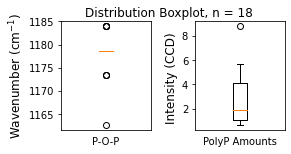

In [39]:
fig2, ax2 = plt.subplots(1,2,figsize=(4,2))
plt.subplots_adjust(wspace=0.5)
ax2[0].boxplot(Xpeak)
ax2[1].boxplot(Ypeak)

ax2[0].set_ylabel("Wavenumber (cm$^{-1}$)",fontsize='large')
ax2[1].set_ylabel("Intensity (CCD) ",fontsize='large')
ax2[0].tick_params(bottom=False)
ax2[0].set_xticklabels(labels=["P-O-P"])
ax2[1].tick_params(bottom=False)
ax2[1].set_xticklabels(labels=["PolyP Amounts"])
fig2.suptitle("Distribution Boxplot, n = {}".format(len(Xpeak)))
fig2.savefig('Boxplot.png',bbox_inches='tight',quality=300)
plt.show()

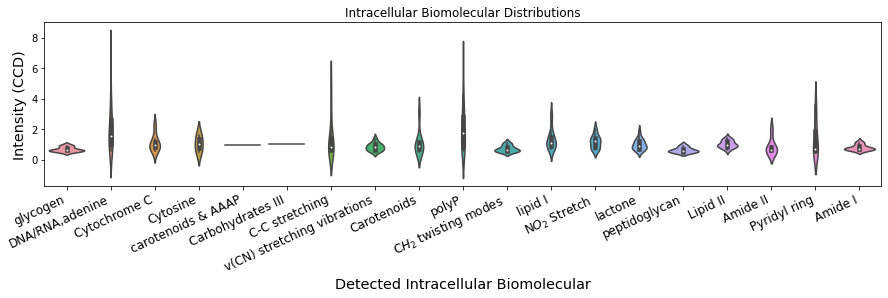

In [28]:
data2 = pd.read_csv(p)#path is the csv file for molecule
fig, ax = plt.subplots(1,1,figsize=(15,3))
ax = sns.violinplot(data=data2,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25,ha='right',fontsize='large')
ax.set_ylabel('Intensity (CCD)',fontsize='x-large')
ax.set_xlabel("Detected Intracellular Biomolecular",fontsize='x-large')
ax.set_title("Intracellular Biomolecular Distributions",fontsize='large')
plt.show()
fig.savefig('Biomol.png',bbox_inches='tight',quality=300)